# Time Value of Money
#### Muhammad Kevin Alrahmanto (19/445592/PA/19416, Universitas Gadjah Mada)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Discounting and compounding cash flows

- Money has a time unit.
- Need exchange rate ($R$) for time a.k.a., rate of return, hurdle rate, opprtunity cost of capital
- "Never" add/subtract cash flows received at different times.

## 1.1  Discounting with constant cash flows (Simulation 1)

- Discounting cash flows moves them back in time

Present value (PV) of cash flows (CFs) is discounted value of CFs as of time (t):
$$
PV=\sum_{t=1}^{\;n}\frac{CF}{{(1+R)}^t}
$$

Example: How much do you have to save today to withdraw $50 at the end of each of the next 9 years if you can earn 5% PER ANNUM?

In [2]:
cf=50 #Constant cash flow
periods=9
rate=5

In [3]:
cfs_discounted=[cf*(1+rate/100)**-period for period in range(1, periods+1)] #Discounted cash flow
CFs=pd.DataFrame({'cash':[np.round(np.sum(cfs_discounted),2)] + [cf]*periods}, #Cash flow timeline
                 index=['CF_'+str(period) if period >0 else 'PV(CF_0)' for period in range(periods+1)])
CFs.T

,PV(CF_0),CF_1,CF_2,CF_3,CF_4,CF_5,CF_6,CF_7,CF_8,CF_9
cash,355.39,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0


In [4]:
interpretation=f'We need ${CFs.iloc[0][0]} today in an account earning {rate}% each year \nso that we can withdraw ${cf} at the end of each the next {periods} years'
print(interpretation)

We need $355.39 today in an account earning 5% each year 
so that we can withdraw $50 at the end of each the next 9 years


In [5]:
post_wb=np.round(np.cumsum(cfs_discounted),2)#Post-Withdrawal Balance
interest=np.round(post_wb*rate/100,2)
saving_simulation=pd.DataFrame({'Year': np.arange(periods+1),
                                'Interest': np.hstack((0,interest[::-1])),
                                'Pre-Withdrawal Balance': np.hstack((post_wb+interest,0))[::-1],  
                                'Withdrawal': np.hstack((0,[cf]*periods)), 
                                'Post-Withdrawal Balance': np.hstack((post_wb[::-1], 0))}).set_index('Year')
saving_simulation

,Interest,Pre-Withdrawal Balance,Withdrawal,Post-Withdrawal Balance
Year,,,,
0,0.00,0.00,0,355.39
1,17.77,373.16,50,323.16
2,16.16,339.32,50,289.32
3,14.47,303.79,50,253.78
4,12.69,266.47,50,216.47
5,10.82,227.29,50,177.30
6,8.86,186.16,50,136.16
7,6.81,142.97,50,92.97
8,4.65,97.62,50,47.62


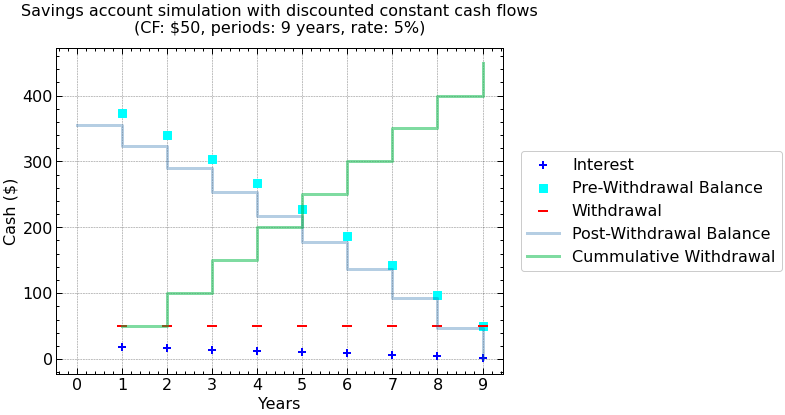

In [6]:
plt.scatter(saving_simulation.index[1:], saving_simulation["Interest"][1:], label ="Interest", color='blue', s=50, marker='+')
plt.scatter(saving_simulation.index[1:], saving_simulation["Pre-Withdrawal Balance"][1:], label ="Pre-Withdrawal Balance", color='cyan', s=50, marker='s')
plt.scatter(saving_simulation.index[1:], saving_simulation["Withdrawal"][1:], label ="Withdrawal", color='red', s=100, marker='_')
plt.step(saving_simulation.index, saving_simulation["Post-Withdrawal Balance"], where='post', lw=3, label ="Post-Withdrawal Balance", alpha=0.3)
plt.step(saving_simulation.index[1:], np.cumsum(saving_simulation["Withdrawal"])[1:], where='post', lw=3, label ="Cummulative Withdrawal", alpha=0.5)

plt.xlabel('Years')
plt.ylabel('Cash ($)')
plt.title(f'Savings account simulation with discounted constant cash flows\n(CF: ${cf}, periods: {periods} years, rate: {rate}%)', pad=15)
plt.xticks(saving_simulation.index)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

## 1.2  Compounding with constant cash flows (Simulation 2)

- Compounding cash flows moves them forward in time

Future value (FV) of cash flows (CFs) is compounded value of CFs as of time (t):
$$
FV=\sum_{t=0}^{\;n}CF{(1+R)}^t
$$

Example: How much will we have 9 years from today if we save $50 a year, beggining today, for the next 8 years, assuming we earn 5% interest PER ANNUM?

In [7]:
cf=50 #Constant deposit 
periods=9
rate=5 

In [8]:
cfs_compounded=[cf*(1+rate/100)**period for period in range(1, periods+1)] #Compounded cash flow
FVs=pd.DataFrame({'cash':[cf]*periods +[np.round(np.sum(cfs_compounded),2)]},
                 index=['CF_'+str(period) if period <periods  else 'FV' for period in range(0, periods+1)])
FVs.T #Deposit timeline

,CF_0,CF_1,CF_2,CF_3,CF_4,CF_5,CF_6,CF_7,CF_8,FV
cash,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,578.89


In [9]:
interpretation=f'We will have ${FVs.iloc[-1][-1]} at the end of {periods} years if we save ${cf} starting \ntoday for the next {periods-1} years and our money earns {rate}% per annum.'
print(interpretation)

We will have $578.89 at the end of 9 years if we save $50 starting 
today for the next 8 years and our money earns 5% per annum.


In [10]:
pre_db=np.round(np.cumsum(cfs_compounded),2) # Pre deposit balance 
dep=np.array([cf]*periods+[0]) #Deposit flows
saving_simulation_2=pd.DataFrame({'Year': np.arange(periods+1),
                                'Interest': np.round(np.hstack((0,(dep+np.hstack((0, pre_db)))[:-1]*rate/100)),2),
                                'Pre-Deposit Balance': np.hstack((0, pre_db)),  
                                'Deposit': dep, 
                                'Post-Deposit Balance': dep+np.hstack((0, pre_db))}).set_index('Year')
saving_simulation_2

,Interest,Pre-Deposit Balance,Deposit,Post-Deposit Balance
Year,,,,
0,0.00,0.00,50,50.00
1,2.50,52.50,50,102.50
2,5.12,107.62,50,157.62
3,7.88,165.51,50,215.51
4,10.78,226.28,50,276.28
5,13.81,290.10,50,340.10
6,17.00,357.10,50,407.10
7,20.36,427.46,50,477.46
8,23.87,501.33,50,551.33


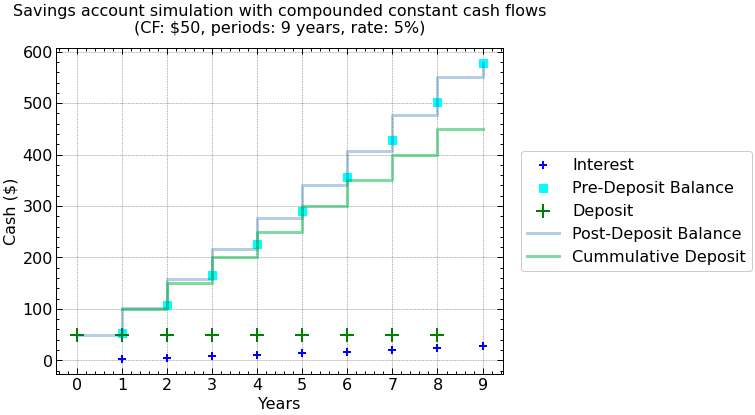

In [11]:
plt.scatter(saving_simulation_2.index[1:], saving_simulation_2["Interest"][1:], label ="Interest", color='blue', s=50, marker='+')
plt.scatter(saving_simulation_2.index[1:], saving_simulation_2["Pre-Deposit Balance"][1:], label ="Pre-Deposit Balance", color='cyan', s=50, marker='s')
plt.scatter(saving_simulation_2.index[:-1], saving_simulation_2["Deposit"][:-1], label ="Deposit", color='green', s=200, marker='+')
plt.step(saving_simulation_2.index, saving_simulation_2["Post-Deposit Balance"], where='post', lw=3, label ="Post-Deposit Balance", alpha=0.3)
plt.step(saving_simulation_2.index[1:], np.cumsum(saving_simulation_2["Deposit"])[1:], where='post', lw=3, label ="Cummulative Deposit", alpha=0.5)

plt.xlabel('Years')
plt.ylabel('Cash ($)')
plt.title(f'Savings account simulation with compounded constant cash flows\n(CF: ${cf}, periods: {periods} years, rate: {rate}%)', pad=15)
plt.xticks(saving_simulation_2.index)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

## 1.3  Discounting with constant cash flows + TAXES (Simulation 3)

Example: How much do you have to save today to withdraw $50 at the end of each of the next 9 years if you can earn 5% PER ANNUM with interest taxes at 35% per annum?

In [12]:
cf=50
periods=9
rate_before_tax=5
tax=35

After-tax discount rate (Rt):
$$
Rt=R(1-tr)
$$
where $R$ is the nominal return and $tr$ is the tax rate

In [13]:
Rt=rate_before_tax/100*(1-tax/100)*100
print(f'The after-tax discount rate is {Rt}%')

The after-tax discount rate is 3.25%


__We will use nominal after-tax discount rate ($Rt$) to discount cash flows!__

In [14]:
cfs_discounted_tax=[cf*(1+Rt/100)**-period for period in range(1, periods+1)] #Discounted cash flow with after-tax discount rate
CFs_tax=pd.DataFrame({'cash':[np.round(np.sum(cfs_discounted_tax),2)] + [cf]*periods},
                 index=['CF_'+str(period) if period >0 else 'PV(CF_0)' for period in range(periods+1)])
CFs_tax.T #Cash flow timeline with after-tax discount rate

,PV(CF_0),CF_1,CF_2,CF_3,CF_4,CF_5,CF_6,CF_7,CF_8,CF_9
cash,384.81,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0


In [15]:
post_wb_tax=np.round(np.cumsum(cfs_discounted_tax),2)#Post-Withdrawal Balance
interest=np.round(post_wb_tax*rate_before_tax/100,2)
taxes=-np.round(interest*tax/100,2)
saving_simulation_3=pd.DataFrame({'Year': np.arange(periods+1),
                                  'Interest': np.hstack((0,interest[::-1])),
                                  'Taxes':np.hstack((0,taxes[::-1])),
                                  'Pre-Withdrawal Balance': np.hstack((post_wb_tax+interest+taxes,0))[::-1],  
                                  'Withdrawal': np.hstack((0,[cf]*periods)), 
                                  'Post-Withdrawal Balance': np.hstack((post_wb_tax[::-1], 0))}).set_index('Year')
saving_simulation_3

,Interest,Taxes,Pre-Withdrawal Balance,Withdrawal,Post-Withdrawal Balance
Year,,,,,
0,0.00,0.00,0.00,0,384.81
1,19.24,-6.73,397.32,50,347.31
2,17.37,-6.08,358.60,50,308.60
3,15.43,-5.40,318.63,50,268.63
4,13.43,-4.70,277.36,50,227.36
5,11.37,-3.98,234.75,50,184.75
6,9.24,-3.23,190.76,50,140.75
7,7.04,-2.46,145.33,50,95.33
8,4.77,-1.67,98.43,50,48.43


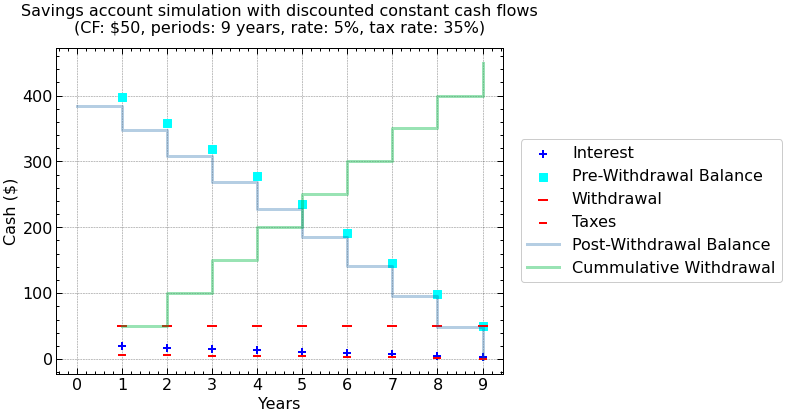

In [16]:
plt.scatter(saving_simulation_3.index[1:], saving_simulation_3["Interest"][1:], label ="Interest", color='blue', s=50, marker='+')
plt.scatter(saving_simulation_3.index[1:], saving_simulation_3["Pre-Withdrawal Balance"][1:], label ="Pre-Withdrawal Balance", color='cyan', s=50, marker='s')
plt.scatter(saving_simulation_3.index[1:], saving_simulation_3["Withdrawal"][1:], label ="Withdrawal", color='red', s=100, marker='_')
plt.scatter(saving_simulation_3.index[1:], np.abs(saving_simulation_3["Taxes"][1:]), label ="Taxes", color='red', s=70, marker='_')
plt.step(saving_simulation_3.index, saving_simulation_3["Post-Withdrawal Balance"], where='post', lw=3, label ="Post-Withdrawal Balance", alpha=0.3)
plt.step(saving_simulation_3.index[1:], np.cumsum(saving_simulation_3["Withdrawal"])[1:], where='post', lw=3, label ="Cummulative Withdrawal", alpha=0.4)

plt.xlabel('Years')
plt.ylabel('Cash ($)')
plt.title(f'Savings account simulation with discounted constant cash flows\n(CF: ${cf}, periods: {periods} years, rate: {rate}%, tax rate: {tax}%)', pad=15)
plt.xticks(saving_simulation_3.index)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

## 1.4  Discounting with VARYING cash flows: the implication of INFLATION (Simulation 4)

Example: How much do you have to save today to withdraw $50 at the end of each of the next 9 years if you can earn 8=5% PER ANNUM with expected inflation at 2.5% per annum?

In [17]:
cf=50
periods=9
rate=5 #nominal rate
inf=2.5 #inflation rate

Real discount rate (RR):
$$
RR=\frac{(1+R)}{(1+\pi)}-1\approx R-\pi
$$
where $R$ is the nominal return and $\pi$ is the expected inflation

In [18]:
RR=(rate/100 - inf/100)*100 #Commmonly used approximation
print(f'The real discount rate is {RR}%')

The real discount rate is 2.5%


__We will keep using nominal rate!__
- __Inflation won't affect the money we earn__
- __Inflation will affect what we can buy with the money__
- __Implication: We need to change withdrawal amount (Increase to buy costlier goods)__

In [19]:
withdrawal_inf=np.round([cf*(1+inf/100)**period for period in range(1, periods+1)], 2)
withdrawal_inf #withdrawals grow each year to accomodate inflation!

array([51.25, 52.53, 53.84, 55.19, 56.57, 57.98, 59.43, 60.92, 62.44])

In [20]:
pv_inf=np.round(np.sum([cf*(1+rate/100)**-(period+1) for period,cf in enumerate(withdrawal_inf)]),2)
CFs_inf=pd.DataFrame({'cash': np.hstack((pv_inf, withdrawal_inf))},
                 index=['CF_'+str(period) if period >0 else 'PV(CF_0)' for period in range(periods+1)])
CFs_inf.T #Varying cash flows timeline

,PV(CF_0),CF_1,CF_2,CF_3,CF_4,CF_5,CF_6,CF_7,CF_8,CF_9
cash,399.68,51.25,52.53,53.84,55.19,56.57,57.98,59.43,60.92,62.44


In [21]:
post_wb_inf=[pv_inf]
for i in range(periods):
    post_wb_inf.append(np.round(post_wb_inf[i]*(1+rate/100)-withdrawal_inf[i], 2))
post_wb_inf #Post-Withdrawal Balance

[399.68, 368.41, 334.3, 297.18, 256.85, 213.12, 165.8, 114.66, 59.47, 0.0]

In [22]:
interest_inf=np.round(np.array(post_wb_inf)*(rate/100),2)
pre_wb_inf=post_wb_inf+interest_inf
saving_simulation_4=pd.DataFrame({'Year': np.arange(periods+1),
                                  'Interest': np.hstack((0,interest_inf[:-1])),
                                  'Pre-Withdrawal Balance': np.hstack((0,pre_wb_inf[:-1] )),  
                                  'Withdrawal': np.hstack((0,withdrawal_inf)), 
                                  'Post-Withdrawal Balance':post_wb_inf}).set_index('Year')
saving_simulation_4

,Interest,Pre-Withdrawal Balance,Withdrawal,Post-Withdrawal Balance
Year,,,,
0,0.00,0.00,0.00,399.68
1,19.98,419.66,51.25,368.41
2,18.42,386.83,52.53,334.30
3,16.72,351.02,53.84,297.18
4,14.86,312.04,55.19,256.85
5,12.84,269.69,56.57,213.12
6,10.66,223.78,57.98,165.80
7,8.29,174.09,59.43,114.66
8,5.73,120.39,60.92,59.47


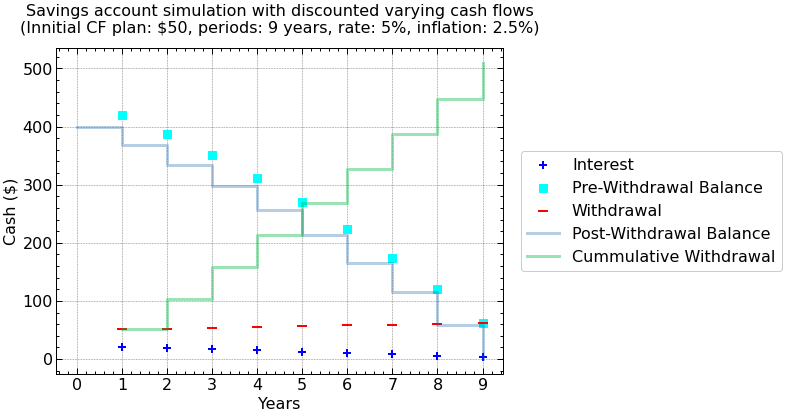

In [23]:
plt.scatter(saving_simulation_4.index[1:], saving_simulation_4["Interest"][1:], label ="Interest", color='blue', s=50, marker='+')
plt.scatter(saving_simulation_4.index[1:], saving_simulation_4["Pre-Withdrawal Balance"][1:], label ="Pre-Withdrawal Balance", color='cyan', s=50, marker='s')
plt.scatter(saving_simulation_4.index[1:], saving_simulation_4["Withdrawal"][1:], label ="Withdrawal", color='red', s=100, marker='_')
plt.step(saving_simulation_4.index, saving_simulation_4["Post-Withdrawal Balance"], where='post', lw=3, label ="Post-Withdrawal Balance", alpha=0.3)
plt.step(saving_simulation_4.index[1:], np.cumsum(saving_simulation_4["Withdrawal"])[1:], where='post', lw=3, label ="Cummulative Withdrawal", alpha=0.4)

plt.xlabel('Years')
plt.ylabel('Cash ($)')
plt.title(f'Savings account simulation with discounted varying cash flows\n(Innitial CF plan: ${cf}, periods: {periods} years, rate: {rate}%, inflation: {inf}%)', pad=15)
plt.xticks(saving_simulation_4.index)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()